In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns


In [2]:
# Load dataset
distinct_words_count = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=distinct_words_count)
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [3]:
# Combine features (x_train and x_test) and labels (y_train and y_test)
x_combined = np.concatenate((x_train, x_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

# Print the shapes of the combined dataset
print("Shape of combined features (x_combined):", x_combined.shape)
print("Shape of combined labels (y_combined):", y_combined.shape)

Shape of combined features (x_combined): (50000,)
Shape of combined labels (y_combined): (50000,)


In [4]:
# Split the combined dataset into training and testing sets
x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(x_combined, y_combined, test_size=0.2, random_state=42)

In [5]:
# Print the shapes of the final training and testing sets
print("Shape of final training features (x_train_final):", x_train_final.shape)
print("Shape of final testing features (x_test_final):", x_test_final.shape)
print("Shape of final training labels (y_train_final):", y_train_final.shape)
print("Shape of final testing labels (y_test_final):", y_test_final.shape)

Shape of final training features (x_train_final): (40000,)
Shape of final testing features (x_test_final): (10000,)
Shape of final training labels (y_train_final): (40000,)
Shape of final testing labels (y_test_final): (10000,)


In [6]:
print(y_test_final) #binary classification - 0 (negative) or 1 (positive)

[0 0 0 ... 1 0 1]


In [7]:
# Pad all sequences so that all sequences are the same size
max_sequence_length = 100
x_train_padded = pad_sequences(x_train_final, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>
x_test_padded = pad_sequences(x_test_final, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>

In [8]:
# Check a sample of the input data
for i in np.random.randint(0, len(x_train_padded), 3):
    offset=3   # word index offset
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+offset) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2
    word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print('=================================================')
print(f'Sample = {i} | Length = {len(x_train_padded[i])}')
print('=================================================')
print(' '.join(id_to_word[id] for id in x_train_padded[i] ))

Sample = 6455 | Length = 100
literally no good idea that isn't borrowed from a better movie and the supporting cast <UNK> the only exception comes from tony burton who is miles better than the material also <UNK> foster looks like she could be better with far better material however <UNK> <UNK> 2 comes off mainly as <UNK> bland and <UNK> as its leading man however with no real martial arts sequences to fall back on all there is is lots of cars <UNK> over and that alone is no <UNK> for the <UNK> of <UNK> expressed here br br 1 2 out of 4 poor


In [9]:
# Define the Keras model
embedding_output_dims = 15
#distinct_words_count was set to 5000 above
#max_sequence_length was set to 100 above
model = Sequential()
model.add(Embedding(distinct_words_count, embedding_output_dims, input_length=max_sequence_length))
model.add(Dropout(0.50))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(Dropout(0.50))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid'))

# Give a summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 15)           75000     
                                                                 
 dropout (Dropout)           (None, 100, 15)           0         
                                                                 
 conv1d (Conv1D)             (None, 100, 32)           992       
                                                                 
 dropout_1 (Dropout)         (None, 100, 32)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 32)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                      

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
number_of_epochs = 100
verbosity_mode = True
validation_split = 0.20
history = model.fit(x_train_padded, y_train_final, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

Epoch 1/100


1000/1000 [==============================] - 4s 3ms/step - loss: 0.5502 - accuracy: 0.6822 - val_loss: 0.3647 - val_accuracy: 0.8430
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3555 - accuracy: 0.8441 - val_loss: 0.3326 - val_accuracy: 0.8545
Epoch 3/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3221 - accuracy: 0.8593 - val_loss: 0.3290 - val_accuracy: 0.8531
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3065 - accuracy: 0.8676 - val_loss: 0.3313 - val_accuracy: 0.8496
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2980 - accuracy: 0.8730 - val_loss: 0.3294 - val_accuracy: 0.8576
Epoch 6/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2909 - accuracy: 0.8754 - val_loss: 0.3363 - val_accuracy: 0.8511
Epoch 7/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2888 - accuracy: 0.8743 - val_loss: 0.3389 - val_

In [12]:
# Evaluate the model after training
test_results = model.evaluate(x_test_padded, y_test_final, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 0.3422981798648834 - Accuracy: 85.29999852180481%


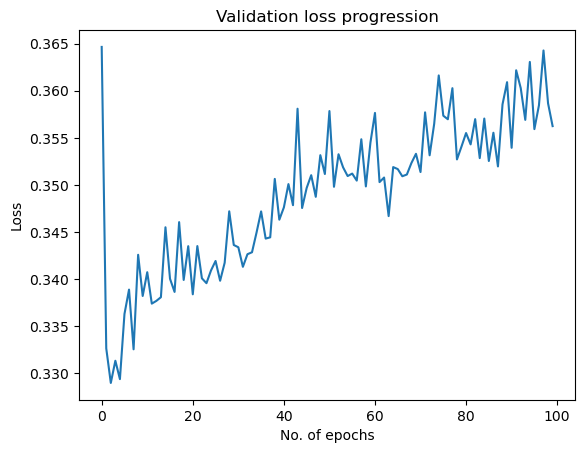

In [13]:
# Visualize history
# Plot history: Validation loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss progression')
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.show()

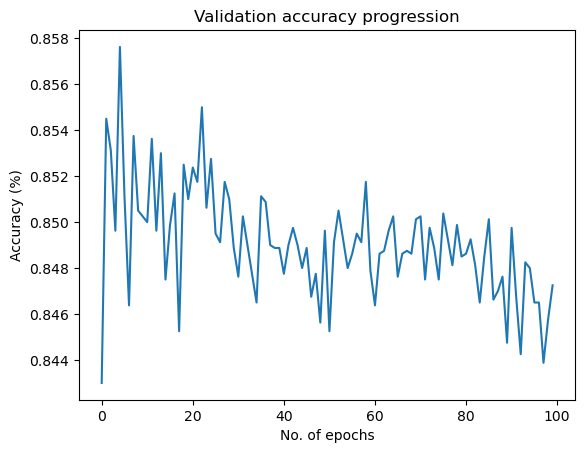

In [14]:
# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy progression')
plt.ylabel('Accuracy (%)')
plt.xlabel('No. of epochs')
plt.show()

313/313 [==============================] - 0s 885us/step
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


<Axes: >

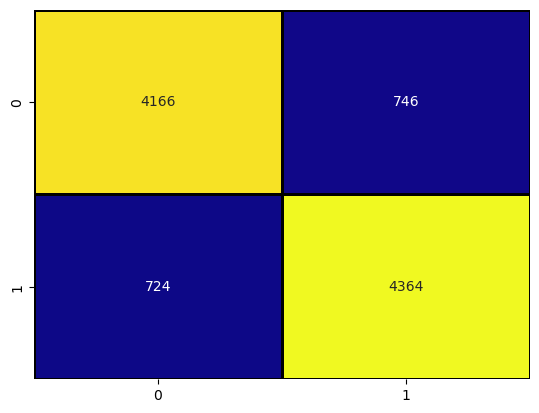

In [15]:
y_pred = model.predict(x_test_padded)
y_pred_rounded = np.round(y_pred)
print(y_pred_rounded)

conf_matrix = confusion_matrix(y_test_final, y_pred_rounded)

sns.heatmap(conf_matrix, annot=True, cmap='plasma', fmt='d', cbar=False, linewidths=1, linecolor='black')

In [16]:
# Save the model
model.save('imdb_data_sentiment_classification')

INFO:tensorflow:Assets written to: imdb_data_sentiment_classification\assets


INFO:tensorflow:Assets written to: imdb_data_sentiment_classification\assets
